# Explore the Flights dataset

The `flights.csv` file in the `datasets` folder contains the dataset that we are going to explore for this practice. It is a dataset containing all the flights from New York airports downloaded using [this](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236) site.

## Loading Libraries and the data

In [1]:
import pandas as pd
import seaborn as sns

flights = pd.read_csv("../datasets/flights.csv")

## Questions

1. Which columns have missing values?

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [4]:
flights.isna().any()

year              False
month             False
day               False
dep_time           True
sched_dep_time    False
dep_delay          True
arr_time           True
sched_arr_time    False
arr_delay          True
carrier           False
flight            False
tailnum            True
origin            False
dest              False
air_time           True
distance          False
hour              False
minute            False
time_hour         False
dtype: bool

1. Show the distribution of the arrival delay. What can you say about this variable?

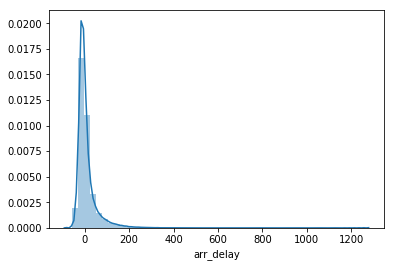

In [10]:
arr_delay_notnull = flights.loc[flights['arr_delay'].notnull(), 'arr_delay']
sns.distplot(arr_delay_notnull)

1. How many flights are there on first of January 2013?

In [18]:
flights_1_jan = flights[(flights['day']==1) & 
                        (flights['month']==1)]
flights_1_jan.shape[0]

842

1. What is the largest distance (in km!) between two airports? Also give the names of the airports.

In [29]:
flights.sort_values(by=['distance'], ascending=False)
flights['distance_km'] = flights['distance'] * 1.6
flights.loc[1, ['distance_km', 'origin', 'dest']]

distance_km    2265.6
origin            LGA
dest              IAH
Name: 1, dtype: object

1. How many different destinations are there?

In [32]:
flights['dest'].unique().size

105

1. What is the most popular destination in January 2013?

In [40]:
flights_jan = flights[flights['month']==1]
(flights_jan
    .groupby('dest')
    .size()
    .reset_index(name='counts')
    .sort_values(by=['counts'], ascending=False))

,dest,counts
1,ATL,1396
60,ORD,1269
7,BOS,1245
46,MCO,1175
30,FLL,1161
43,LAX,1159
18,CLT,1058
50,MIA,981
80,SFO,889
23,DCA,865


1. What is the median of the distance of all the flights with carrier `DL`?

In [45]:
flights.loc[flights['carrier']=='DL', 'distance'].median()

1020.0

1. Show in a graph if more flights arrive with a delayed or on time.

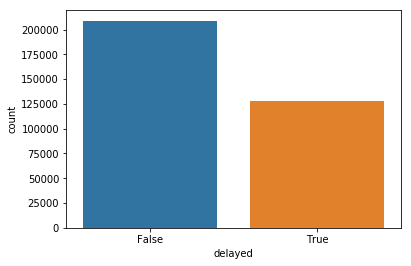

In [52]:
flights['delayed'] = flights['arr_time'] > flights['sched_arr_time']
sns.countplot(x='delayed', data=flights)

In [ ]:
1. Show in a graph what the most popular times are for a flight to take off.